In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [114]:
# suicides age 0-14 (Canada) is the control variable
df_control = pd.read_csv('source_data/csv/suicides0-14.csv')

# these are the data sets we'll examine to see if they are correlated w/ the suicide rates

# Sugar per person (g per day)
df_sugar = pd.read_csv('source_data/csv/sugar_consumption.csv')

# Government and civil society aid (% of total aid)
df_aid = pd.read_csv('source_data/csv/aid.csv')

# Electricity consumption, per capita (kWh)
df_elec = pd.read_csv('source_data/csv/electricity_consumption.csv')

In [115]:
# replace spaces with underscores and make lowercase to ease column renaming
df_control.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_sugar.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_aid.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_elec.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [116]:
# rename country column in place so we can easily pull out the Canadian data
df_control.rename(columns={'suicide_0-14_all_age_adj': 'country'}, inplace=True)
df_sugar.rename(columns={'unnamed:_0': 'country'}, inplace=True)
df_aid.rename(columns={'government_and_civil_society_aid_(%_of_total_aid)': 'country'}, inplace=True)
df_elec.rename(columns={'electricity_consumption,_per_capita_(kwh)': 'country'}, inplace=True)

In [117]:
# pull out just the Canada data for each dataset
df_control_can = df_control.loc[df_control['country'] == 'Canada']
df_sugar_can = df_sugar.loc[df_sugar['country'] == 'Canada']
df_aid_can= df_aid.loc[df_aid['country'] == 'Canada']
df_elec_can = df_elec.loc[df_elec['country'] == 'Canada']

In [118]:
# drop country column from each dataset. we're going to turn these columns into rows
# and we don't want a row for country.
cols = [0]

df_control_can.drop(df_control_can.columns[cols], axis=1, inplace=True)
df_sugar_can.drop(df_sugar_can.columns[cols], axis=1, inplace=True)
df_aid_can.drop(df_aid_can.columns[cols], axis=1, inplace=True)
df_elec_can.drop(df_elec_can.columns[cols], axis=1, inplace=True)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [119]:
# transpose each dataframe, we want 1 year / row
df_control_can = df_control_can.T
df_sugar_can = df_sugar_can.T
df_aid_can = df_aid_can.T
df_elec_can = df_elec_can.T

In [120]:
# rename the columns
df_control_can.index.name = 'year'
df_control_can.columns = ['suicides']

df_sugar_can.index.name = 'year'
df_sugar_can.columns = ['sugar']

df_aid_can.index.name = 'year'
df_aid_can.columns = ['aid']

df_elec_can.index.name = 'year'
df_elec_can.columns = ['electricity']

In [121]:
# drop if any value in the row has a nan
df_control_can.dropna(how='any', inplace = True);
df_sugar_can.dropna(how='any', inplace = True);
df_aid_can.dropna(how='any', inplace = True);
df_elec_can.dropna(how='any', inplace = True);

In [122]:
# for merging ease, make the year a column
df_control_can.reset_index(inplace = True)
df_sugar_can.reset_index(inplace = True)
df_aid_can.reset_index(inplace = True)
df_elec_can.reset_index(inplace = True)

In [123]:
df = pd.merge(df_control_can, df_sugar_can)
df = pd.merge(df, df_aid_can)
df = pd.merge(df, df_elec_can)

In [124]:
df.head()

,year,suicides,sugar,aid,electricity
0,1972,0.325459,131.51,3.784353,9903.776327
1,1973,0.339213,128.77,0.654057,10297.948209
2,1975,0.362898,120.55,2.117721,10436.942565
3,1976,0.306694,128.77,7.336720,11043.838762
4,1977,0.498363,126.03,3.749176,11762.481089


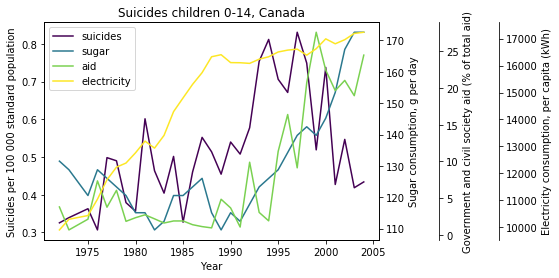

In [133]:
# c.f. https://stackoverflow.com/a/45925049/3199246

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

host.set_title('Suicides children 0-14, Canada')

host.set_xlabel('Year')
host.set_ylabel('Suicides per 100 000 standard population')

par1.set_ylabel('Sugar consumption, g per day')
par2.set_ylabel('Government and civil society aid (% of total aid)')
par3.set_ylabel('Electricity consumption, per capita (kWh)')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)
color3 = plt.cm.viridis(0.8)
color4 = plt.cm.viridis(1.2)

p1, = host.plot(df['year'], df['suicides'], color=color1, label="suicides")
p2, = par1.plot(df['year'], df['sugar'], color=color2, label="sugar")
p3, = par2.plot(df['year'], df['aid'], color=color3, label="aid")
p4, = par3.plot(df['year'], df['electricity'], color=color4, label="electricity")

lns = [p1, p2, p3, p4]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 120))

#host.yaxis.label.set_color(p1.get_color())
#par1.yaxis.label.set_color(p2.get_color())
#par2.yaxis.label.set_color(p3.get_color())
#par3.yaxis.label.set_color(p4.get_color())

plt.show()